In [ ]:
!pip install ipywidgets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import ipywidgets as widgets
from IPython.display import display


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Split data
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



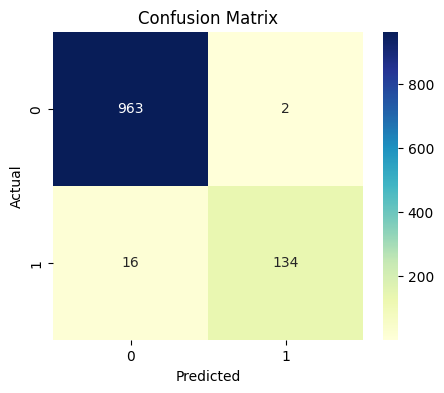

In [ ]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
def predict_spam(msg):
    vec = vectorizer.transform([msg])
    prediction = model.predict(vec)[0]
    return "Spam 🚨" if prediction == 1 else "Not Spam ✅"

text_input = widgets.Textarea(
    value='',
    placeholder='Type your email or message here...',
    description='Message:',
    layout=widgets.Layout(width='100%', height='100px')
)

button = widgets.Button(description="Check Spam", button_style='info')

output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        result = predict_spam(text_input.value)
        print(f"\n📨 Your message is classified as: {result}")

button.on_click(on_button_clicked)

display(text_input, button, output)


Textarea(value='', description='Message:', layout=Layout(height='100px', width='100%'), placeholder='Type your…

Button(button_style='info', description='Check Spam', style=ButtonStyle())

Output()